### plot the density and temperature profiles, and images, of the radmc3d model

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from radmc3dPy import *
%matplotlib inline

In [21]:
data = analyze.readData(ddens=True, dtemp=True)

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


Reading dustkappa_silicate.inp
Opacity at 0.50um :  28460.764433351476


<a list of 2 text.Text objects>

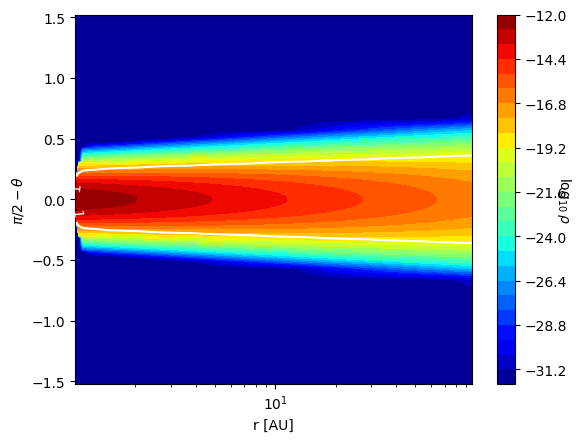

In [22]:
c1 = plt.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, np.log10(data.rhodust[:,:,0,0].T), 30, cmap='jet')
plt.xlabel('r [AU]')
plt.ylabel(r'$\pi/2-\theta$')
plt.xscale('log')
cb = plt.colorbar(c1)
cb.set_label(r'$\log_{10}{\rho}$', rotation=270.)

data.getTau(wav=0.5)
c2 = plt.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.taux[:,:,0].T, [1.0],  colors='w', linestyles='solid')
plt.clabel(c2, inline=1, fontsize=10)

Reading dustkappa_silicate.inp


Text(0, 0.5, '$\\kappa_{\\rm abs}$ [cm$^2$/g]')

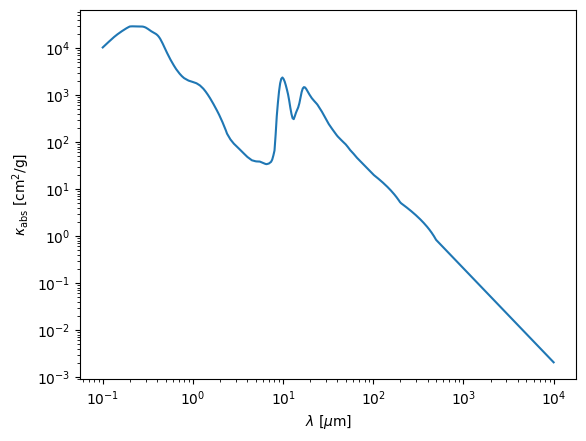

In [4]:
opac = analyze.readOpac(ext=['silicate'])
plt.loglog(opac.wav[0], opac.kabs[0])
plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel(r'$\kappa_{\rm abs}$ [cm$^2$/g]')

<a list of 9 text.Text objects>

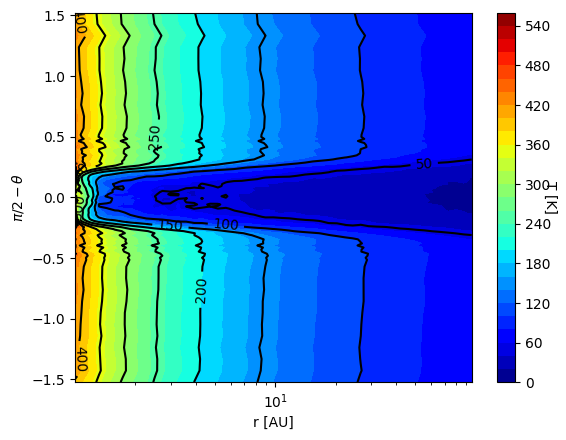

In [5]:
c1 = plt.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, 30, cmap='jet')
plt.xlabel('r [AU]')
plt.ylabel(r'$\pi/2-\theta$')
plt.xscale('log')
cb = plt.colorbar(c1)
cb.set_label('T [K]', rotation=270.)

c2 = plt.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, 10,  colors='k', linestyles='solid')
plt.clabel(c2, inline=1, fontsize=10)

In [6]:
# remove lines.inp if necessary otherwise this crashes
image.makeImage(npix=300., wav=2.2, incl=20., phi=0., sizeau=300.)

Executing RADMC-3D Command:
radmc3d image npix 300 incl 20.0 sizeau 300.0 lambda 2.2 phi 0.0 pointau 0.0  0.0  0.0 fluxcons
  
      WELCOME TO RADMC-3D: A 3-D CONTINUUM AND LINE RT SOLVER    
                                                                 
                          VERSION 2.0                            
                                                                 
                (c) 2008-2020 Cornelis Dullemond                 
                                                                 
       Please feel free to ask questions. Also please report     
        bugs and/or suspicious behavior without hestitation.     
      The reliability of this code depends on your vigilance!    
                    dullemond@uni-heidelberg.de                  
                                                                 
   To keep up-to-date with bug-alarms and bugfixes, register to  
                     the RADMC-3D forum:                         
            htt

0

In [7]:
im = image.readImage()

Reading image.out


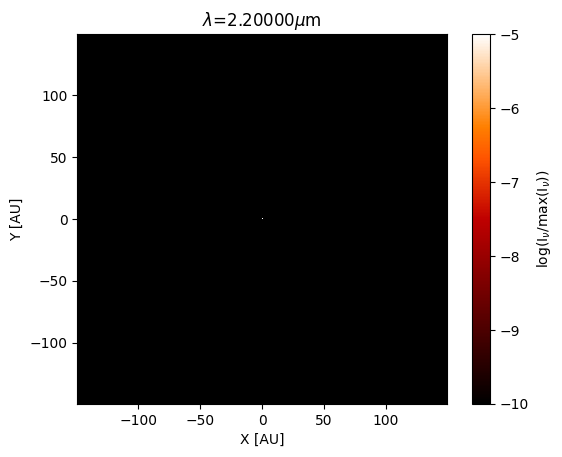

{'implot': <matplotlib.image.AxesImage at 0x7ff1b0979550>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7ff1b09cb7c0>}

In [8]:
image.plotImage(im, au=True, log=True, maxlog=10, saturate=1e-5, cmap='gist_heat')

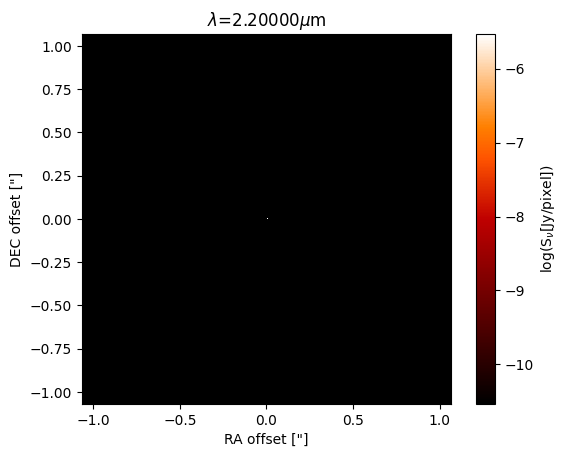

{'implot': <matplotlib.image.AxesImage at 0x7ff1b0c73340>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7ff1913df370>}

In [9]:
image.plotImage(im, arcsec=True, dpc=140., log=True, maxlog=10, saturate=1e-5, bunit='snu', cmap='gist_heat')

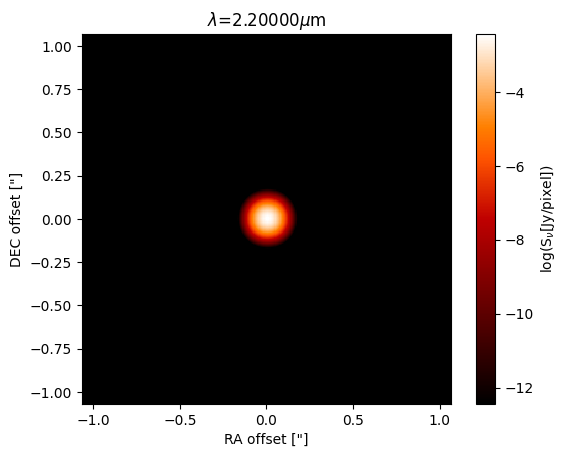

{'implot': <matplotlib.image.AxesImage at 0x7ff151240bb0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7ff150dcf8e0>}

In [10]:
cim = im.imConv(fwhm=[0.06, 0.06], pa=0., dpc=140.)
image.plotImage(cim, arcsec=True, dpc=140., log=True, maxlog=10, bunit='snu', cmap='gist_heat')

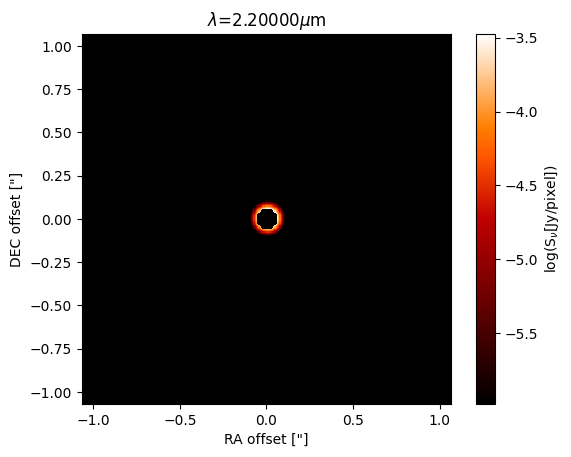

{'implot': <matplotlib.image.AxesImage at 0x7ff160bdf730>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7ff160ce3d90>}

In [16]:
image.plotImage(cim, arcsec=True, dpc=140., log=True, maxlog=2.5, bunit='snu', cmask_rad=0.06, cmap='gist_heat')

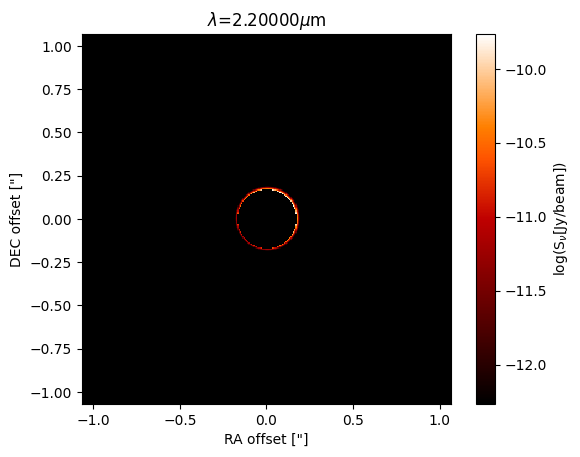

{'implot': <matplotlib.image.AxesImage at 0x7ff19123f970>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7ff1703effa0>}

In [12]:
image.plotImage(cim, arcsec=True, dpc=140., log=True, maxlog=2.5, bunit='jy/beam', cmask_rad=0.17, cmap='gist_heat')

In [13]:
im.writeFits('myimage.fits', dpc=140., coord='03h10m05s -10d05m30s')